Préparation des données
==

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment=None #  quand on utilise une copie de data frame

In [2]:
dataset=pd.read_table('paris_airbnb.csv',sep=',')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    5000 non-null   object 
 1   host_acceptance_rate  0 non-null      float64
 2   host_listings_count   7999 non-null   float64
 3   latitude              8000 non-null   float64
 4   longitude             8000 non-null   float64
 5   city                  7997 non-null   object 
 6   zipcode               7930 non-null   object 
 7   state                 7977 non-null   object 
 8   accommodates          8000 non-null   int64  
 9   room_type             8000 non-null   object 
 10  bedrooms              7976 non-null   float64
 11  bathrooms             7942 non-null   float64
 12  beds                  7986 non-null   float64
 13  price                 8000 non-null   object 
 14  cleaning_fee          6250 non-null   object 
 15  security_deposit     

In [4]:
# nettoyer les variables 
# nettoyer la colonne "price" ,"cleaning_fee","security_deposit"en enlevant les dollars et les virgules 
cols=['price','cleaning_fee','security_deposit']
for i in range(len(cols)):
    stripped_commas=dataset[cols[i]].str.replace(',','')
    stripped_dollars=stripped_commas.str.replace('$','')
    dataset[cols[i]]=stripped_dollars.astype('float') # conversion en float

In [5]:
#  suppression des colonnes indirectement liés à la variables "price"
drop_columns=['host_response_rate','host_acceptance_rate','host_listings_count',
              'state','longitude','zipcode','security_deposit','cleaning_fee',
              'latitude','city']
dataset=dataset.drop(drop_columns,axis=1)

In [6]:
#  detecter les valeurs manquantes
print(dataset.isnull().sum())

accommodates          0
room_type             0
bedrooms             24
bathrooms            58
beds                 14
price                 0
minimum_nights        0
maximum_nights        0
number_of_reviews     0
dtype: int64


In [7]:
# supprimer les lignes ayant des valeurs nulles
dataset=dataset.dropna(axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7917 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       7917 non-null   int64  
 1   room_type          7917 non-null   object 
 2   bedrooms           7917 non-null   float64
 3   bathrooms          7917 non-null   float64
 4   beds               7917 non-null   float64
 5   price              7917 non-null   float64
 6   minimum_nights     7917 non-null   int64  
 7   maximum_nights     7917 non-null   int64  
 8   number_of_reviews  7917 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 618.5+ KB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Nombre total de type de logement selon les modalités
==

<Figure size 648x216 with 0 Axes>

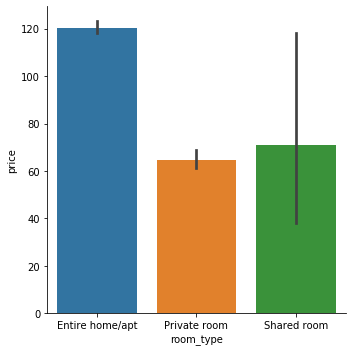

In [9]:
plt.figure(figsize=(9, 3))
# Visualisation exploratoire 
sns.catplot(x="room_type", y="price", data=dataset, kind="bar")


Distribution du prix selon le nombre de chambres
==

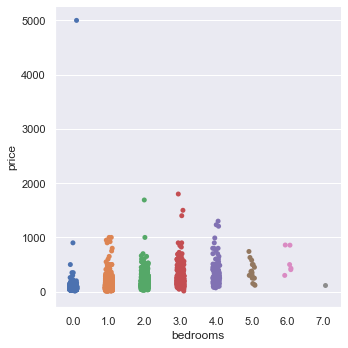

In [1626]:
sns.catplot(x="bedrooms", y="price", data=dataset)

Distribution du prix selon le nombre de voyageur
==

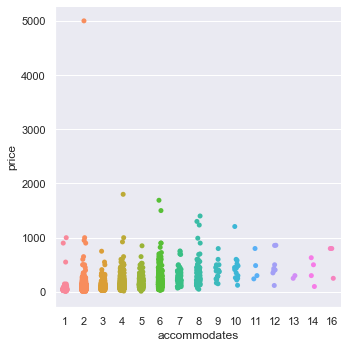

In [1627]:
sns.catplot(x="accommodates", y="price", data=dataset)

Distribution du prix selon le nombre de lits
==

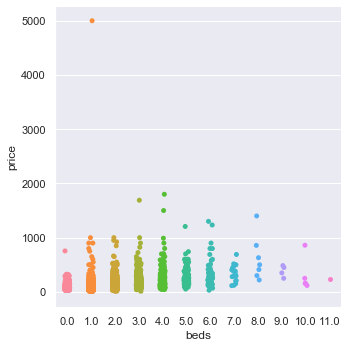

In [1628]:
sns.catplot(x="beds", y="price", data=dataset)

Distribution du prix selon le nombre de salle de bains
==

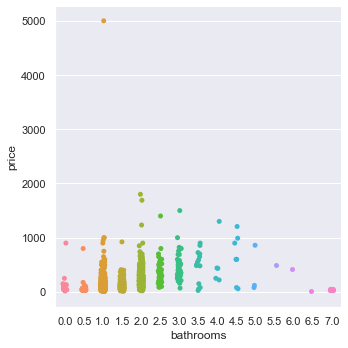

In [1629]:
sns.catplot(x="bathrooms", y="price", data=dataset)

Text(0, 0.5, "probabilité d'occurence")

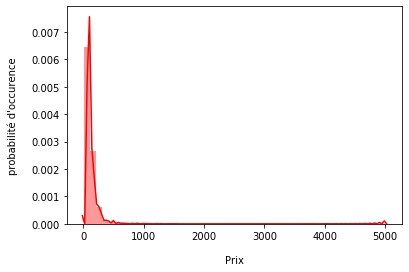

In [10]:
#  distribution de la densité de la variable prix
sns.distplot(dataset['price'] , color="red")
plt.xlabel("Prix", labelpad=14)
plt.ylabel("probabilité d'occurence", labelpad=14)
#plt.title("distribution de la variable prix", y=1.015, fontsize=15);

In [11]:
dataset=dataset[['accommodates','bedrooms','beds','bathrooms','price']]

In [12]:
from scipy import stats
#  supprimer les lignes dont les valeurs sont comprises, par exemple 3 écarts types par rapport à la moyenne.
dataset=dataset[(np.abs(stats.zscore(dataset)) <3).all(axis=1)]

In [13]:
dataset.describe()

,accommodates,bedrooms,beds,bathrooms,price
count,7538.000000,7538.000000,7538.000000,7538.000000,7538.000000
mean,3.038870,1.156806,1.630937,1.071106,101.614752
std,1.297246,0.702037,0.956065,0.252462,59.892165
min,1.000000,0.000000,0.000000,0.000000,8.000000
25%,2.000000,1.000000,1.000000,1.000000,60.000000
50%,3.000000,1.000000,1.000000,1.000000,85.000000
75%,4.000000,1.000000,2.000000,1.000000,120.000000
max,7.000000,3.000000,5.000000,2.000000,450.000000


Text(0, 0.5, "probabilité d'occurence")

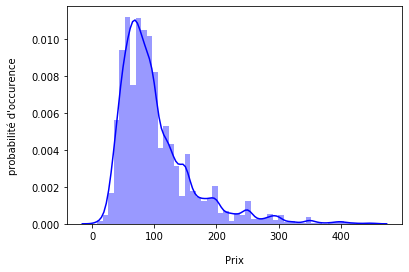

In [14]:
#  distribution de la densité de la variable prix
sns.distplot(dataset['price'] , color="blue")
plt.xlabel("Prix", labelpad=14)
plt.ylabel("probabilité d'occurence", labelpad=14)
#plt.title("distribution de la variable prix", y=1.015, fontsize=15);

In [15]:
# Séparation des données en variables explicatives X et target y 
X = dataset.drop('price',axis=1)
y = dataset[['price']]

In [16]:
# appliquons le log pour diminumer la variabilité de la variance du prix
#dataset['price']=dataset['price'].apply(lambda x: np.math.log(x))

In [17]:
dataset.var()

accommodates       1.682846
bedrooms           0.492856
beds               0.914059
bathrooms          0.063737
price           3587.071413
dtype: float64

Text(0.5, 1, 'Matrice de corrélation\n')

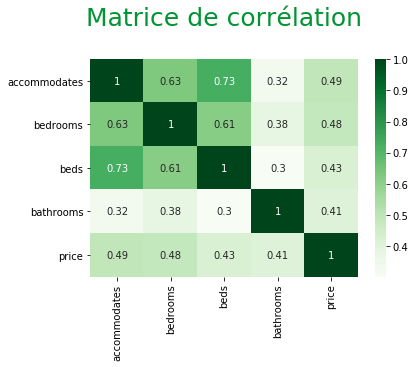

In [18]:
#  représentation de la matrice de correlation
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(dataset.corr(), annot=True, cmap='Greens')
plt.title("Matrice de corrélation\n",
              fontsize=25, color='#009432')

In [1536]:
# Dummyfication 
#  dataset = pd.get_dummies(dataset, drop_first=True)

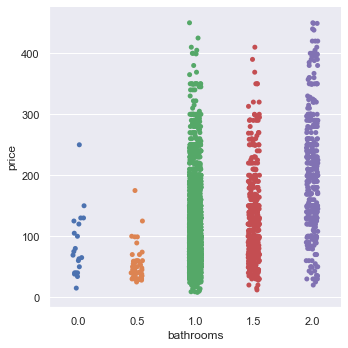

In [1698]:
sns.catplot(x="bathrooms", y="price", data=dataset)

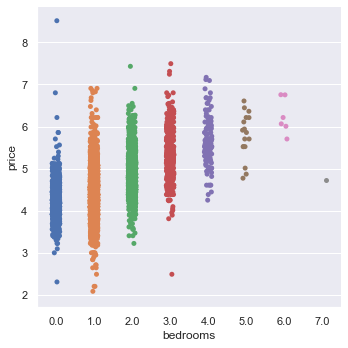

In [1578]:
sns.catplot(x="bedrooms", y="price", data=dataset)

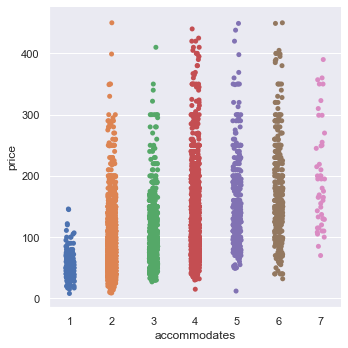

In [1672]:
sns.catplot(x="accommodates", y="price", data=dataset)

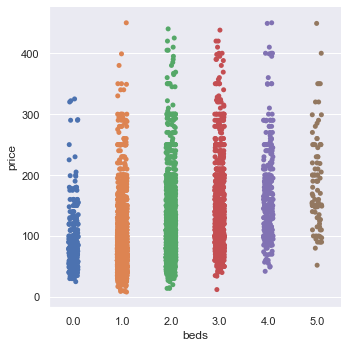

In [1673]:
sns.catplot(x="beds", y="price", data=dataset)

In [1674]:
# Normalisation des données StandardScaler
# from sklearn.preprocessing import StandardScaler

# sc_x = StandardScaler()
# X = sc_x.fit_transform(X)

Regression Linéaire multiple
==

In [19]:

# Division du dataset en train et un test set 
from sklearn.model_selection import train_test_split

# Création du modèle
from sklearn.linear_model import LinearRegression

#tester la stabilité du modèle avec plusieurs jeux de données
train_rmse=[]
test_rmse=[]
scores_train=[]
scores_test=[]
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # Faire des prédictions sur le set de training et de test 
    train_predictions=lr.predict(X_train)
    test_predictions=lr.predict(X_test)
    
    # calculer la valeur RMSE et Variance
    from sklearn.metrics import mean_squared_error
    # RMSE sur les prédictions 
    test_rmse.append(np.sqrt(mean_squared_error(y_test,test_predictions)))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,train_predictions)))
    scores_train.append(lr.score(X_train, y_train))
    scores_test.append(lr.score(X_test, y_test))

In [20]:
scoresnp_train = np.array(scores_train)
scoresnp_test = np.array(scores_test)

# Vérifcation de l'overfitting 
print("RMSE de Train : {}".format(np.mean (train_rmse)))
print("RMSE de Test : {}".format(np.mean(test_rmse)))
# Vérifcation de l'overfitting 
print("Score de Train : {}".format(scoresnp_train.mean()))
print("Score de Test : {}".format(scoresnp_test.mean()))
print("coefficient des variables indépendantes : {}".format(lr.coef_))

RMSE de Train : 48.694391184931284
RMSE de Test : 48.321882458749485
Score de Train : 0.34067018124997306
Score de Test : 0.3402689753653087
coefficient des variables indépendantes : [[11.66877108 17.0361132   3.0087897  56.19808583]]


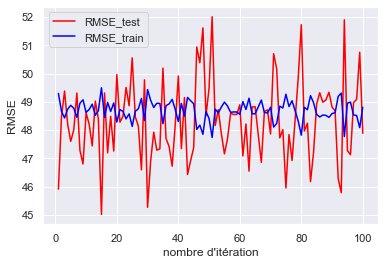

In [1702]:
x=list(range(1,101,1))
plt.plot(x,test_rmse,c='red',label='RMSE_test')
plt.plot(x,train_rmse,c='blue',label='RMSE_train')

plt.legend()
plt . xlabel ( "nombre d'itération" ) 
plt . ylabel ( "RMSE" ) 
plt.show()

Decision Tree Regression
==

Optimisation de l'hyperparamètre max_depth
==


In [1751]:
# Division du dataset en train et un test set 
from sklearn.model_selection import train_test_split
# Création d'un modèle d'arbres de decisions 
from sklearn.tree import DecisionTreeRegressor

#tester la stabilité du modèle avec plusieurs jeux de données

hyper_params=list(range(1,101,1))
rmse_hyperm=[]
for k in range(len(hyper_params)): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    regressor = DecisionTreeRegressor(max_depth=hyper_params[k] )
    regressor.fit(X_train, y_train)
    
     # Faire des prédictions sur le set de training
    predictions=regressor.predict(X_test)
    
    # calculer la valeur RMSE et Variance
    from sklearn.metrics import mean_squared_error
    # estimaeur du RMSE et de la variance sur les prédictions des données de test
    rmse_hyperm.append(np.sqrt(mean_squared_error(y_test,predictions)))

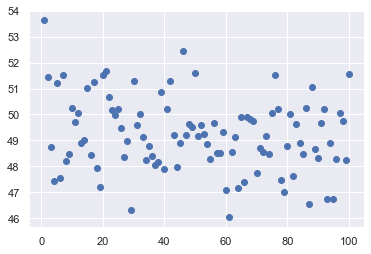

In [1752]:
plt.scatter(hyper_params,rmse_hyperm)
plt.show()

In [1753]:
# Division du dataset en train et un test set 
from sklearn.model_selection import train_test_split
# Création d'un modèle d'arbres de decisions 
from sklearn.tree import DecisionTreeRegressor

#tester la stabilité du modèle avec plusieurs jeux de données
train_rmse=[]
test_rmse=[]
scores_train=[]
scores_test=[]
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    dtr = DecisionTreeRegressor( max_depth=5)
    dtr.fit(X_train, y_train)
    
    # Faire des prédictions sur le set de training et de test 
    train_predictions=dtr.predict(X_train)
    test_predictions=dtr.predict(X_test)
    
    # calculer la valeur RMSE et Variance
    from sklearn.metrics import mean_squared_error
    # RMSE sur les prédictions 
    test_rmse.append(np.sqrt(mean_squared_error(y_test,test_predictions)))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,train_predictions)))  
    scores_train.append(dtr.score(X_train, y_train))
    scores_test.append(dtr.score(X_test, y_test))
    

In [1754]:
scoresnp_train = np.array(scores_train)
scoresnp_test = np.array(scores_test)

# Vérifcation de l'overfitting 
print("RMSE de Train : {}".format(np.mean(train_rmse)))
print("RMSE de Test : {}".format(np.mean(test_rmse)))
# Vérifcation de l'overfitting 
print("Score de Train : {}".format(scoresnp_train.mean()))
print("Score de Test : {}".format(scoresnp_test.mean()))

RMSE de Train : 47.67153003462486
RMSE de Test : 48.1081146460396
Score de Train : 0.3680742493702248
Score de Test : 0.3460465404226729


In [29]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [30]:
features=list(dataset.columns[:-1])
features

['accommodates', 'bedrooms', 'beds', 'bathrooms']

In [28]:
dot_data=StringI0()

NameError: name 'StringI0' is not defined

la Méthode des K plus proches voisins
==

In [1680]:
# Division du dataset en train et un test set 
from sklearn.model_selection import train_test_split

# Création d'un modèle d'arbres de decisions 
from sklearn.neighbors import KNeighborsRegressor

#tester la stabilité du modèle avec plusieurs jeux de données
train_rmse=[]
test_rmse=[]
scores_train=[]
scores_test=[]
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    kn = KNeighborsRegressor(n_neighbors=5,algorithm='brute')
    kn.fit(X_train, y_train)
    
    # Faire des prédictions sur le set de training et de test 
    train_predictions=kn.predict(X_train)
    test_predictions=kn.predict(X_test)
    
    # calculer la valeur RMSE et Variance
    from sklearn.metrics import mean_squared_error
    # RMSE sur les prédictions 
    test_rmse.append(np.sqrt(mean_squared_error(y_test,test_predictions)))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,train_predictions)))  
    scores_train.append(kn.score(X_train, y_train))
    scores_test.append(kn.score(X_test, y_test))

In [1681]:
scoresnp_train = np.array(scores_train)
scoresnp_test = np.array(scores_test)

# Vérifcation de l'overfitting 
print("RMSE de Train : {}".format(np.mean(train_rmse)))
print("RMSE de Test : {}".format(np.mean(test_rmse)))
# Vérifcation de l'overfitting 
print("Score de Train : {}".format(scoresnp_train.mean()))
print("Score de Test : {}".format(scoresnp_test.mean()))

RMSE de Train : 50.1380026727523
RMSE de Test : 51.710170842270216
Score de Train : 0.30032618241831804
Score de Test : 0.24386649394928572


Optimisation de l'hyperparamètres K
==

Random Forest R
==

In [1553]:
# Division du dataset en train et un test set 
from sklearn.model_selection import train_test_split

# Création d'un modèle d'arbres de decisions 
from sklearn.ensemble import RandomForestRegressor

#tester la stabilité du modèle avec plusieurs jeux de données
train_rmse=[]
test_rmse=[]
scores_train=[]
scores_test=[]
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    rfr = RandomForestRegressor(n_estimators=200)
    rfr.fit(X_train, y_train)
    
    # Faire des prédictions sur le set de training et de test 
    train_predictions=rfr.predict(X_train)
    test_predictions=rfr.predict(X_test)
    
    # calculer la valeur RMSE et Variance
    from sklearn.metrics import mean_squared_error
    # RMSE sur les prédictions 
    test_rmse.append(np.sqrt(mean_squared_error(y_test,test_predictions)))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,train_predictions)))  
    scores_train.append(rfr.score(X_train, y_train))
    scores_test.append(rfr.score(X_test, y_test))

/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expe

/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expe

/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expe

/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/catalina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expe

In [1555]:
scoresnp_train = np.array(scores_train)
scoresnp_test = np.array(scores_test)

# Vérifcation de l'overfitting 
print("RMSE de Train : {}".format(np.mean (train_rmse)))
print("RMSE de Test : {}".format(np.mean(test_rmse)))
# Vérifcation de l'overfitting 
print("Score de Train : {}".format(scoresnp_train.mean()))
print("Score de Test : {}".format(scoresnp_test.mean()))

RMSE de Train : 70.06474521995767
RMSE de Test : 72.93552290615482
Score de Train : 0.3805106435175254
Score de Test : 0.3322969896316327
